# Diabetes Classification

#### Problem Description: 

Predict whether one will develop diabetes (or not based) using Logistic Regression.


#### Solution:

Create a model that will allow us to enter a few factors related to health of a person and be able to provide an outcome as to whether one will develop diabetes or not. 


#### Conclusion:

We see some positive correlatation between Glucose and Outcome of Diabetes (R value = 0.46). It looks like glucose, when compared to the other featuers, seems most correlated with outcome of diabetes. The logisitic regression model was trained on this data. The results obtained, when comparing the actual test (y) values with what was predicted (y-hat) by this model using test data (X), was an accuracy of 77%. Accuracy can be a misleading metric if the dataset is highly imbalanced. So a better metric to use in that case would be the AUC-ROC curve.
Although our dataset is a relatively balanced balanced one: 66:34, we also used AUC-ROC curve as another metric to evaluate performance of our classifer.

The AUC-ROC curve to determine the model's performance at classification. This probability curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). AUC represents the degree or measure of separability. It tells to what degree (by how much) the model is capable of distinguishing between classes. In this case, we received an AUC score of 0.83, which means that there is an 83% chance the classifer model will be able to distinguish or classify the outcome (diabetes or no diabetes) of a patient based on the test data that was used. The higher the AUC value the better the model can distinghish between disease and no disease.

### Obtain Data

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import csv
import seaborn as sns

In [197]:
df = pd.read_csv("/Users/afra/Desktop/ML-Projects-June2021/Github_Proj/Git_101-master/diabetes.csv")

In [198]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [200]:
round(df.describe(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,3.70,121.18,69.15,20.94,80.25,32.19,0.47,33.09,0.34
std,3.31,32.07,19.19,16.10,111.18,8.15,0.32,11.79,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,63.50,0.00,0.00,27.37,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,40.00,32.30,0.38,29.00,0.00
75%,6.00,141.00,80.00,32.00,130.00,36.80,0.62,40.00,1.00
max,17.00,199.00,122.00,110.00,744.00,80.60,2.42,81.00,1.00


### Exploratory Data Analysis (EDA)

In [201]:
df.isnull().sum() # no missing values in this dataframe

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [202]:
df['Outcome'].value_counts() # Is data balanced or not?

0    1316
1     684
Name: Outcome, dtype: int64

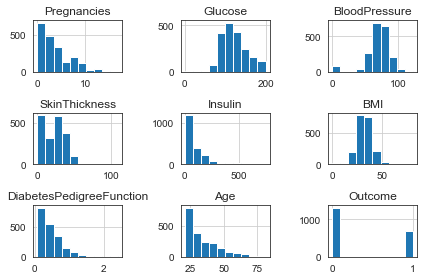

In [203]:
# Using pandas hist() plot to take a look at the distribution of each feature
df.hist() 

pyplot.tight_layout()
pyplot.show()

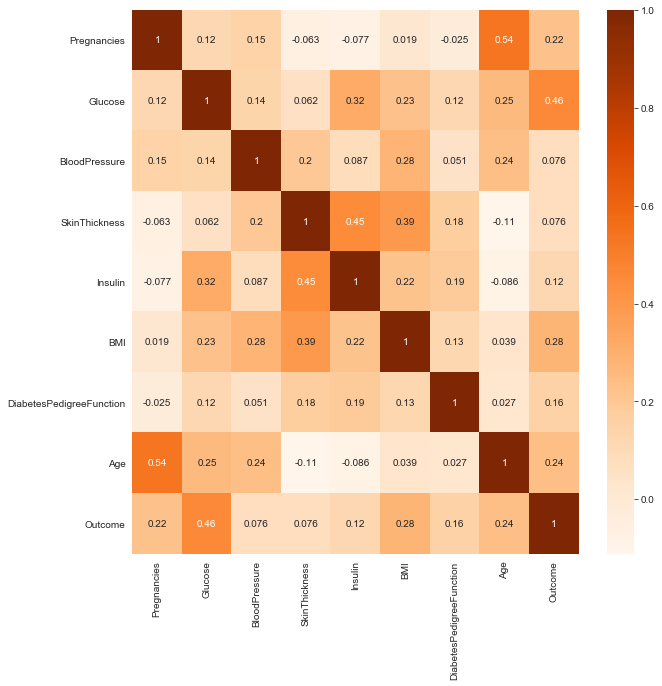

In [204]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Oranges')

# If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
# It looks like glucose, when compared to the other featuers, seems to be most correlated with outcome of diabetes.

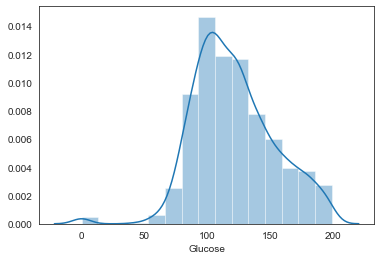

In [205]:
# Seaborn does not have its own histogram plot

sns.set_style(style ='white')
sns.distplot(df['Glucose'], bins = 15) # Pretty much a normal distribution, but below 50 we see an outlier.

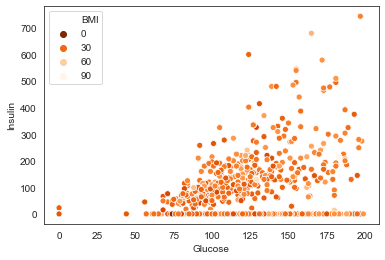

In [206]:
sns.scatterplot(data=df,x='Glucose',y='Insulin',hue='BMI',palette='Oranges_r')

# We see a positive correlation between Glucose levels and Insulin levels.

### Training and Testing Logistic Regression Model 

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [208]:
y = df['Outcome']

In [209]:
X = df.drop(['Outcome'], axis = 1)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =101)

In [211]:
lg = LogisticRegression()

In [212]:
lg.fit(X_train,y_train)

/Users/afra/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
predictions = lg.predict(X_test)

### Evaluation of Model Performance

In [214]:
print('Accuracy: %.2f' % metrics.accuracy_score(y_test, predictions))

Accuracy: 0.77


Text(0.5, 257.44, 'Predicted label')

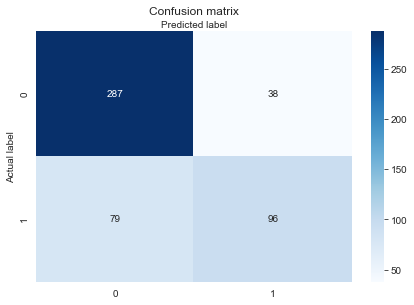

In [215]:
#A Higher TPR and a lower FNR is desirable since we want to correctly classify the positive class.

# Below is based on Actual Values:
# TPR (Sensitivity or recall) = what proportion of the positive class got correctly classified by model (higher the better) 
# FPR = what proportion of the positive class got incorrectly classified by model (higher the better)
# Specificity = 1 - FPR

cnf_matrix = metrics.confusion_matrix(y_test, predictions)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='d') # format annotated values
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


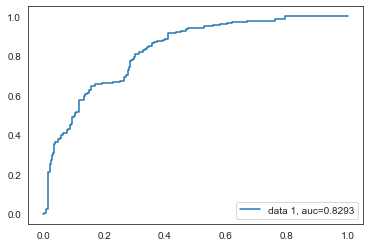

In [219]:
#AUC score for the case is 0.83, which is a good. 

#Notes:
#The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).
#AUC score 1 represents perfect classifier and 0.5 represents a useless classifier.

y_pred_proba = lg.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc = round(auc,4)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()